> # Multiple Linear Regression Case Study



**PROBLEM STATEMENT**
There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.

The goal of the case is as follows:

•	Perform EDA

•	Check Linear regression assumptions

•	Check for multicollinearity 

•	Predict the price of old cars


Notebook has following sections:

1- Data understanding and exploration

2- Data cleaning

3- Data preparation: Feature Engineering and Scaling

4- Feature Selection for Model Building

5- Linear Regression Assumptions Validation and Outlier Removal

6- Removing Multicollinearity, Model Re-evaluation and Assumptions Validation

# EDA steps to be done:

* Removing duplicates
* Missing value treatment
* Outlier Treatment
* Normalizing and Scaling( Numerical Variables)
* Encoding Categorical variables( Dummy Variables)
* Bivariate Analysis

# Section 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('figure', figsize=(20.0, 6.0))


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [0]:
df = pd.read_csv("Cars.csv")

In [3]:
df.shape

(5961, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
Name                 5961 non-null object
Location             5950 non-null object
Year                 5959 non-null float64
Kilometers_Driven    5953 non-null float64
Fuel_Type            5961 non-null object
Transmission         5934 non-null object
Owner_Type           5946 non-null object
Mileage              5959 non-null object
Engine               5944 non-null object
Power                5929 non-null object
Colour               5950 non-null object
Seats                5956 non-null float64
No. of Doors         5960 non-null float64
New_Price            824 non-null object
Price                5961 non-null float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


* Only Name, Fuel_Type & Price has no missing value
* Maximum variables are in object format


**Preprocessing**

In [5]:
df['Name']

0              Mahindra Scorpio
1                 Maruti Baleno
2                 Mahindra Xylo
3                 Hyundai Grand
4                 Toyota Innova
                 ...           
5956                Honda Civic
5957                Hyundai i20
5958               Maruti Swift
5959    Mercedes-Benz SLK-Class
5960                Hyundai i10
Name: Name, Length: 5961, dtype: object

In [0]:
manu = ["maruti", "hyundai", "honda", "toyota", "mercedes-benz", "volkswagen", 
        "ford", "mahindra", "bmw", "audi", "tata", "skoda", "nissan", "mitsubishi", 
        "land rover", "renault", "porsche", "datsun", "jaguar", "volvo", "chevrolet", 
        "fiat" , "mini" , "jeep" , "isuzu" , "force one" , 
        "bentley", "lamborghini", "ambassador", "smart"]

manufacturer_c = "(" + "|".join(manu) + ")"

brands = ['wagon r', 'ertiga', 'ciaz', 'swift', 'alto', 'brezza', 'ritz', 'eeco', 'omni', 'zen', 'estilo', 
          'maruti 800', 'baleno', 'dzire', 'celerio', 'sx4', 'esteem', 'ignis', 's-cross', 's cross', 'a-star', 
          'vitara', 'versa', 'maruti 1000', 'creta', 'eon', 'i20', 'magna', 'elantra', 'xcent', 'santro', 'i10', 'verna', 
          'accent', 'getz', 'santa fe', 'tucson', 'sonata', 'jazz', 'city', 'amaze', 'wrv', 'civic', 'cr-v', 'brio', 'accord', 
          'brv', 'mobilio', 'br-v', 'wr-v', 'corolla altis', 'corolla', 'innova crysta', 'innova', 'fortuner', 'etios liva', 'etios', 
          'camry', 'qualis', 'c-class', 'c class', 'm-class', 'm class', 'b class', 'b-class', 's class', 's-class', 'e-class', 'e class', 'gl-class', 
          'a class', 'a-class', 'r-class', 'r class', 'slc', 'glc', 'gle', 'gls', 'slk', 'cla', 'vento', 'polo', 'jetta', 'passat', 'ameo', 
          'beetle', 'tiguan', 'figo', 'fiesta', 'ecosport', 'endeavour', 'ikon', 'aspire', 'mustang', 'freestyle', 'classic', 'fusion', 
          'kuv', 'xuv', 'tuv', 'thar', 'scorpio', 'nuvo', 'verito', 'bolero', 'rexton', 'xylo', 'logan', 'quanto', 'jeep', '3 series', 
          '5 series', '6 series', '1 series', '7 series', 'x1', 'x3', 'x5', 'x6', 'z4', 'a3', 'a4', 'a6', 'a7', 'a8', 'q3', 'q5', 'q7', 
          'rs5', 'tt', 'nano', 'indica', 'indigo', 'zest', 'xenon', 'manza', 'sumo', 'safari', 'tiago', 'tigor', 'hexa', 'bolt', 'venture', 
          'nexon', 'rapid', 'laura', 'fabia', 'octavia', 'superb', 'yeti', 'micra', 'terrano', 'teana', 'sunny', 'x-trail', 'evalia',  'pajero', 'cedia', 'outlander', 'lancer', 'montero', 'range rover', 'freelander', 'discovery', 'duster', 'kwid', 'lodgy', 'captur', 
          'koleos', 'scala', 'pulse', 'fluence', 'cayenne', 'boxster', 'cayman', 'panamera', 'go plus', 'go nxt', 'redi-go', 'redi go', 'go t', 
          'xe', 'xf', 'xj', 'f type', 'cross country', 's80', 's60', 'xc60', 'v40', 'xc90', 'beat', 'optra', 'spark', 'enjoy', 'sail', 'aveo', 'cruze', 
          'captiva', 'chevrolet tavera', 'linea', 'punto', 'petra', 'siena', 'avventura', 'countryman', 'convertible', 'clubman', 'mini cooper', 
          'compass', 'max', 'mux', 'lx', 'spur', 'coupe', 'classic', 'fortwo']

brands_c = "(" + "|".join(brands) + ")"


In [7]:
df['No. of Doors'].value_counts()

4.0    5224
5.0     719
2.0      17
Name: No. of Doors, dtype: int64

In [8]:
df['Seats'].value_counts()

5.0     5013
7.0      674
8.0      117
4.0       99
6.0       31
2.0       17
10.0       3
9.0        2
Name: Seats, dtype: int64

In [9]:
df['Location'].value_counts()

Mumbai        781
Hyderabad     739
Kochi         646
Coimbatore    630
Pune          611
Delhi         549
Kolkata       526
Chennai       489
Jaipur        406
Bangalore     351
Ahmedabad     222
Name: Location, dtype: int64

In [10]:
df['Fuel_Type'].value_counts()

Diesel      3188
Petrol      2705
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [11]:
df['New_Price'].isnull().sum()

5137

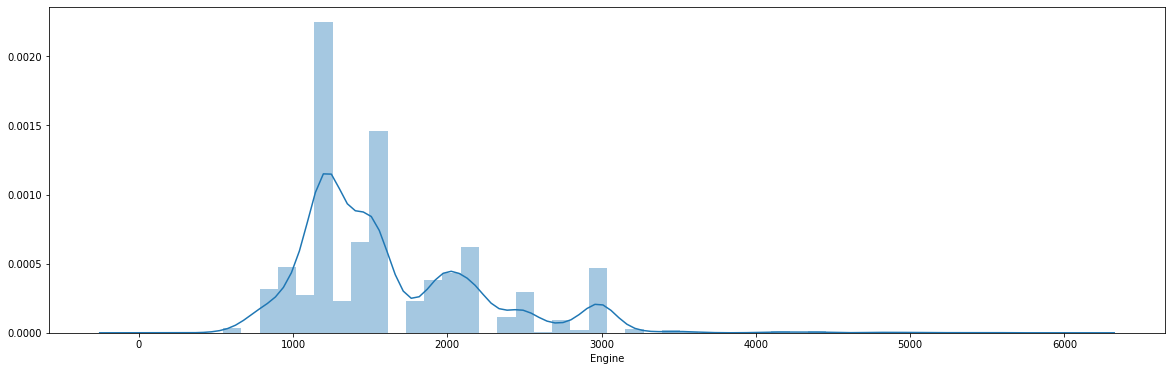

In [12]:
Engine_dist = df.Engine.str.replace(" CC", "").astype(float)
Engine_dist.dropna
sns.distplot(Engine_dist)
plt.show()

**Understanding the features and data**

We will be using a different command to quickly remove suffix present in Engine, Mileage, Power

Dataframe.**assign()** method assign new columns to a DataFrame, returning a new object (a copy) with the new columns added to the original ones. Existing columns that are re-assigned will be overwritten.

In [13]:
def clean_data(dataset) :
    
        op_set_1 = (dataset
                    .assign( Engine = dataset.Engine.str.replace(" CC", "").astype(float) )
                    .assign( Mileage = dataset.Mileage.str.replace(" k.*", "").astype(float) )
                    .assign( Power = dataset.Power.str.replace(" bhp", "") )
                    
                    .assign( Seats = np.where(dataset.Seats > 5, 1, 0) )
                    .assign( Kilometers_Driven = dataset.Kilometers_Driven / 1000 )
                    .assign( VehicleAge = 2020 - dataset.Year )

                    .assign( Manufacturer = dataset.Name.str.lower().str.extract(manufacturer_c) )  
                    .assign( Brands = dataset.Name.str.lower().str.extract(brands_c) )
                    
                    .assign( Tier = dataset.Location.replace(
                        ["Mumbai", "Delhi", "Kolkata", "Chennai", "Hyderabad", "Bangalore", "Pune", "Kochi", "Coimbatore", "Jaipur", "Ahmedabad"], 
                        [1,1,1,1,1,1,1,2,2,2,2]) )
              
                    .query( 'Fuel_Type != "Electric"' ) # One hot encoding dropped
                   )
        
        
        op_set_2 = (op_set_1
                    .assign( Power = op_set_1.Power.str.replace("null", "NaN").astype(float) )
                    
                    .assign( Brands = op_set_1.Brands.replace(
                        ["s cross", "br-v", "c class", "m class", "b class", "s class", "e class", "a class", "r class", "redi go"],
                        ["s-cross", "brv", "c-class", "m-class", "b-class", "s-class", "e-class", "a-class", "r-class", "redi-go"]) )
                    
                   )
        
        # Around 80% in New_Price is NA.
        op_set_3 = (op_set_2
                    .assign( Engine = np.log(op_set_2.Engine) )
                    .assign( Power = np.log(op_set_2.Power) )
                    
                    .drop(["New_Price", "Year", "Name"], axis = 1)
                    
                   )
        
        return(op_set_3)
    
train_data = clean_data(df)
train_data.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,VehicleAge,Manufacturer,Brands,Tier
0,Pune,99.000,Diesel,Manual,Third,12.05,7.686621,4.787492,Black/Silver,1,5.0,6.00,8.0,mahindra,scorpio,1.0
1,Kochi,18.678,Petrol,Manual,First,21.10,6.905753,4.605170,Others,0,4.0,8.32,2.0,maruti,baleno,2.0
2,Bangalore,197.000,Diesel,Manual,First,11.68,7.823246,4.718499,White,1,5.0,4.00,7.0,mahindra,xylo,1.0
3,Delhi,45.000,Diesel,Manual,First,24.00,7.021084,4.248495,White,0,4.0,3.49,6.0,hyundai,NaN,1.0
4,Delhi,65.000,Diesel,Manual,First,12.80,7.821643,4.624973,Others,1,5.0,6.40,9.0,toyota,innova,1.0


**Outlier Treatment**

In [14]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR) 
upper_range= Q3+(1.5 * IQR)
print(IQR,lower_range, upper_range)

Kilometers_Driven    39.077000
Mileage               5.840000
Engine                0.504462
Power                 0.610490
Seats                 0.000000
No. of Doors          0.000000
Price                 6.500000
VehicleAge            4.000000
Tier                  1.000000
dtype: float64 Kilometers_Driven   -24.692500
Mileage               6.500000
Engine                6.331717
Power                 3.401753
Seats                 0.000000
No. of Doors          4.000000
Price                -6.250000
VehicleAge           -2.000000
Tier                 -0.500000
dtype: float64 Kilometers_Driven    131.615500
Mileage               29.860000
Engine                 8.349563
Power                  5.843713
Seats                  0.000000
No. of Doors           4.000000
Price                 19.750000
VehicleAge            14.000000
Tier                   3.500000
dtype: float64


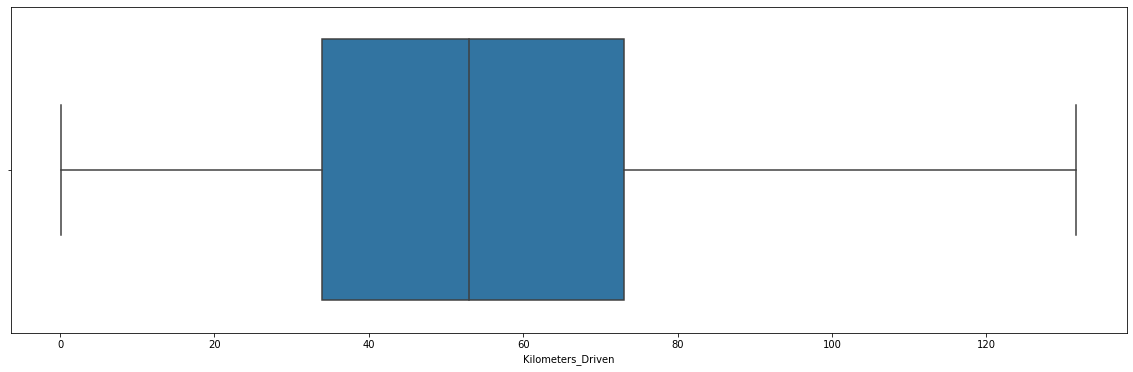

In [19]:
sns.boxplot(train_data['Kilometers_Driven'])

In [0]:
train_data['Kilometers_Driven']=np.where(train_data['Kilometers_Driven']> 131.6,131.6,train_data['Kilometers_Driven'])

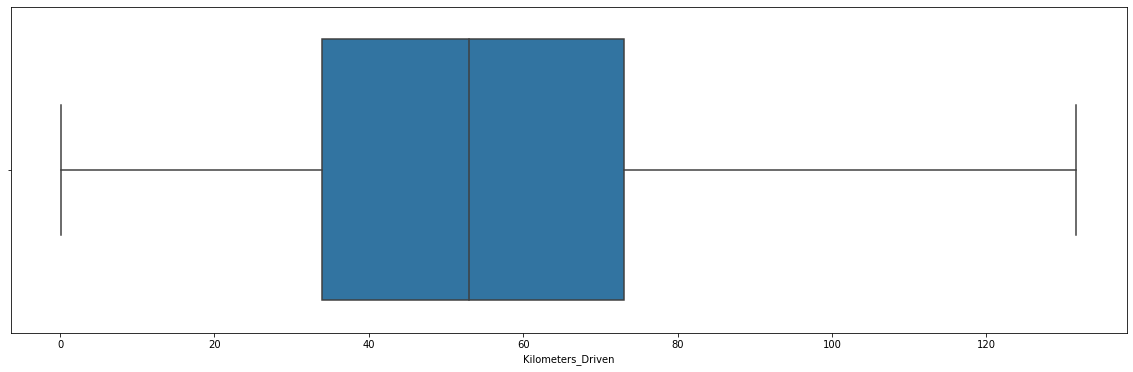

In [16]:
sns.boxplot(train_data['Kilometers_Driven'])

In [0]:
sns.boxplot(train_data['Mileage'])

In [0]:
train_data['Mileage']=np.where(train_data['Mileage']> 29.86,29.86,train_data['Mileage'])
train_data['Mileage']=np.where(train_data['Mileage']< 6.5,6.5,train_data['Mileage'])

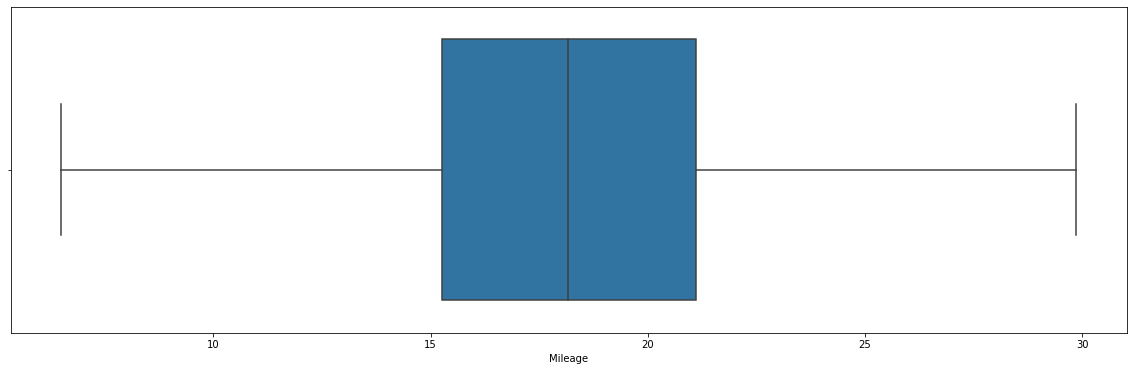

In [18]:
sns.boxplot(train_data['Mileage'])

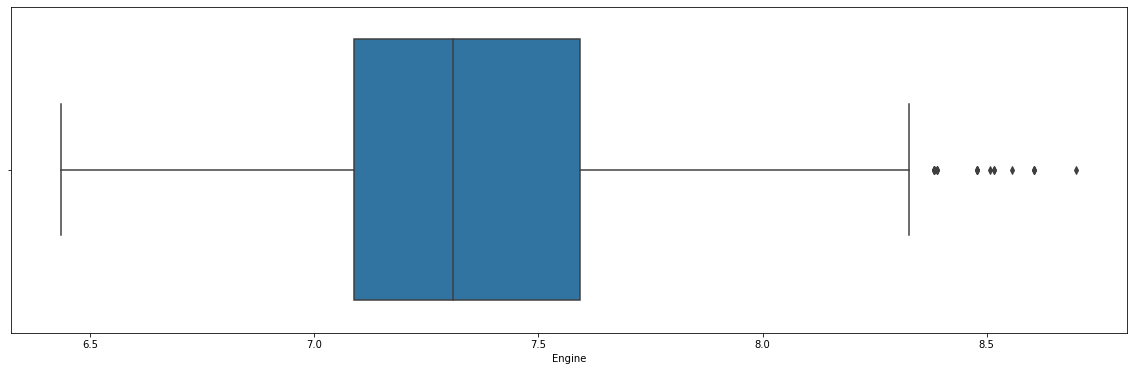

In [20]:
sns.boxplot(train_data['Engine'])

In [0]:
train_data['Engine']=np.where(train_data['Engine']> 8.349,8.349,train_data['Engine'])

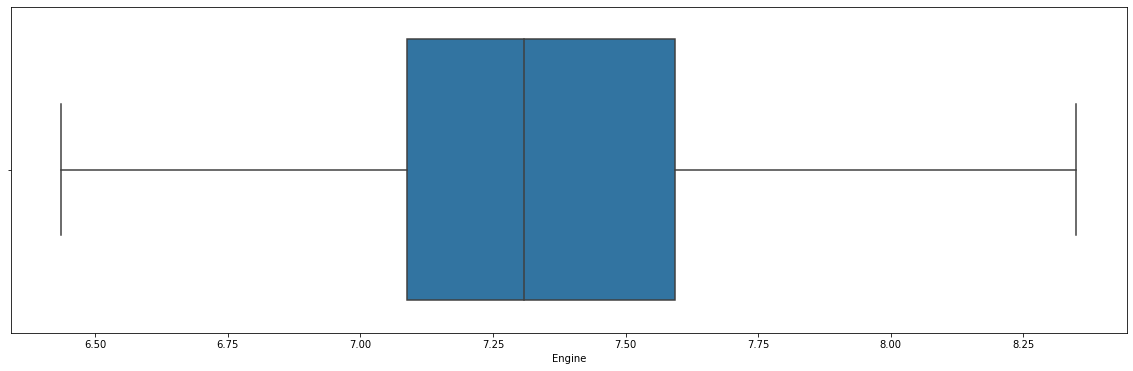

In [22]:
sns.boxplot(train_data['Engine'])

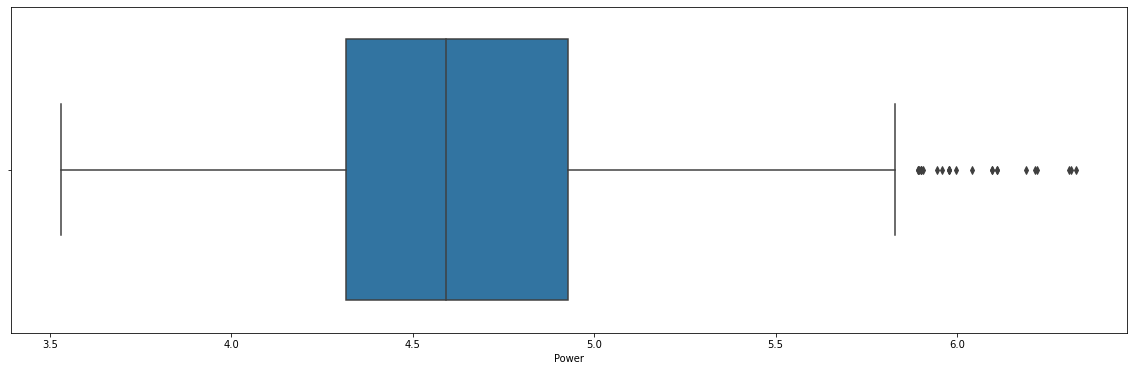

In [23]:
sns.boxplot(train_data['Power'])

In [0]:
train_data['Power']=np.where(train_data['Power']> 5.84,5.84,train_data['Power'])
#train_data['Power']=np.where(train_data['Power']< 3.4,3.4,train_data['Power'])

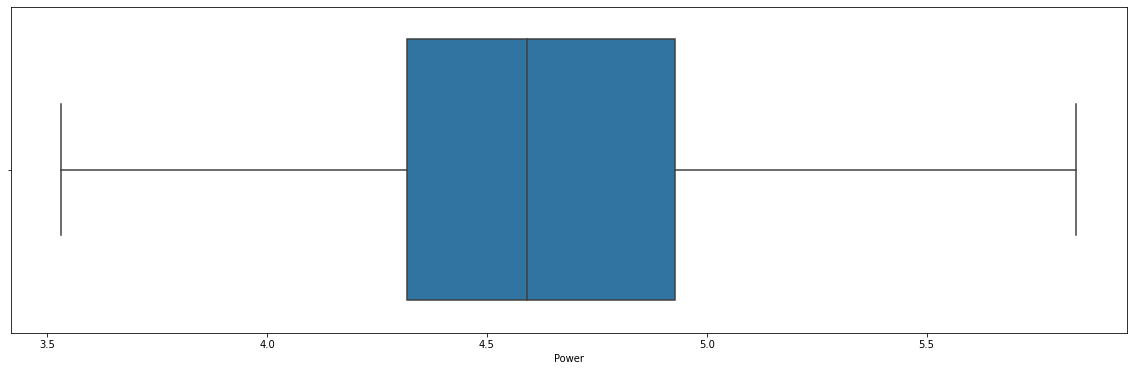

In [25]:
sns.boxplot(train_data['Power'])

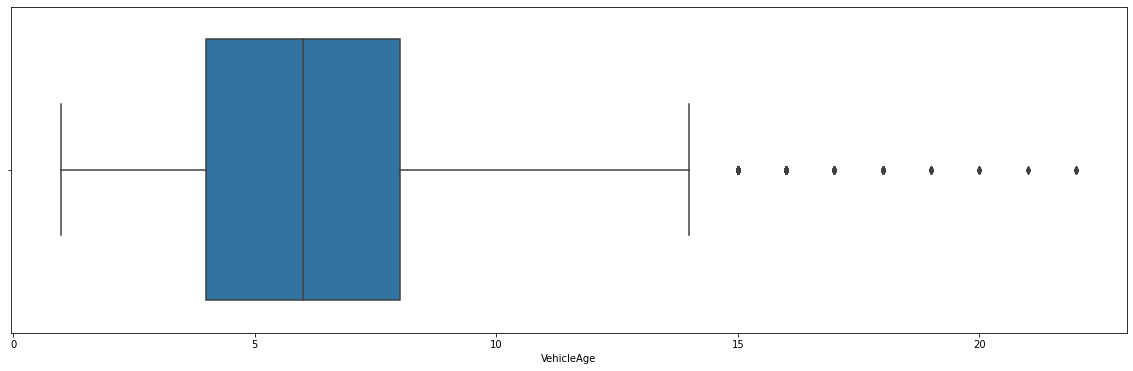

In [26]:
sns.boxplot(train_data['VehicleAge'])

In [0]:
train_data['VehicleAge']=np.where(train_data['VehicleAge']> 14,14,train_data['VehicleAge'])

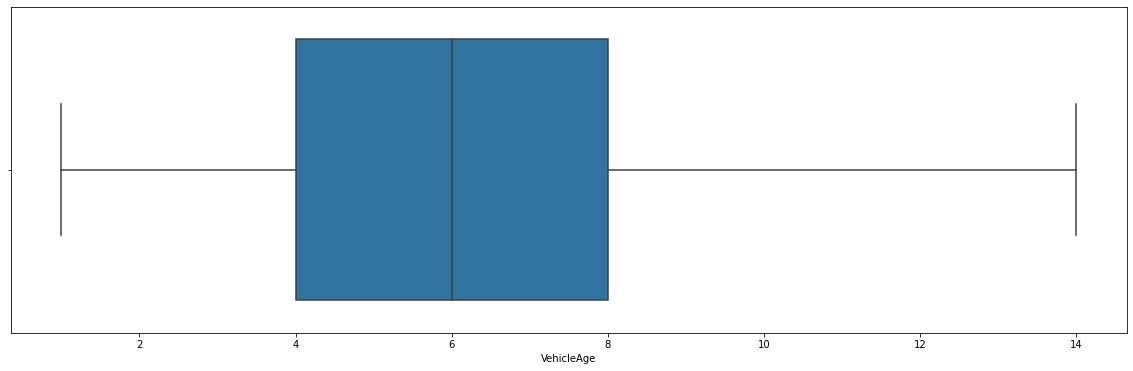

In [28]:
sns.boxplot(train_data['VehicleAge'])

**Univarate Analysis**

In [29]:
train_data['Fuel_Type'].astype('category').value_counts() #Diesel car are high in proportion than other types

Diesel    3188
Petrol    2705
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [30]:
train_data['Owner_Type'].astype('category').value_counts() # Data highly skewed towards First hand

First             4873
Second             953
Third              110
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [31]:
train_data['Transmission'].astype('category').value_counts() # Manual Transmission is more prevalent than automatic

Manual       4225
Automatic    1707
Name: Transmission, dtype: int64

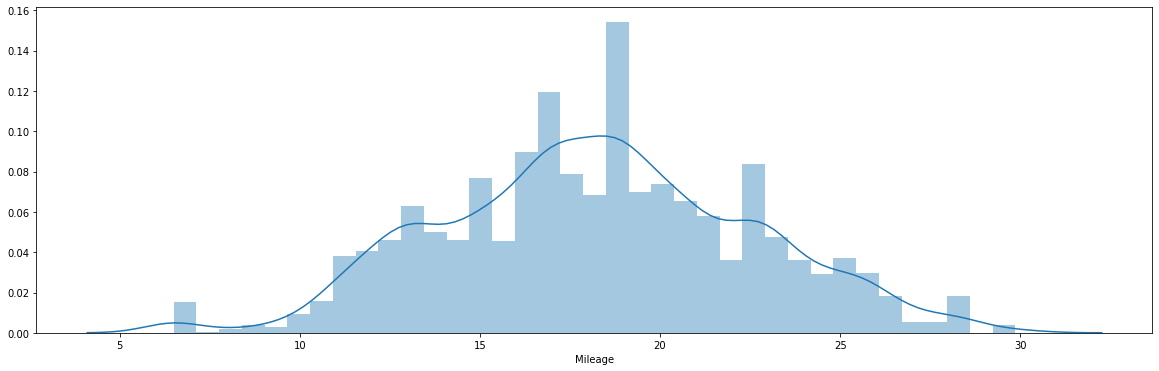

In [32]:
sns.distplot(train_data['Mileage'])
plt.show()

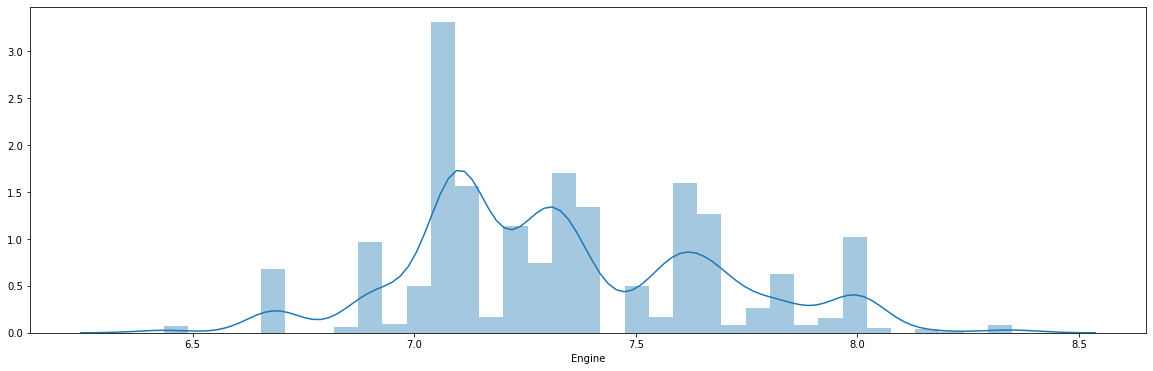

In [33]:
sns.distplot(train_data['Engine'])
plt.show()

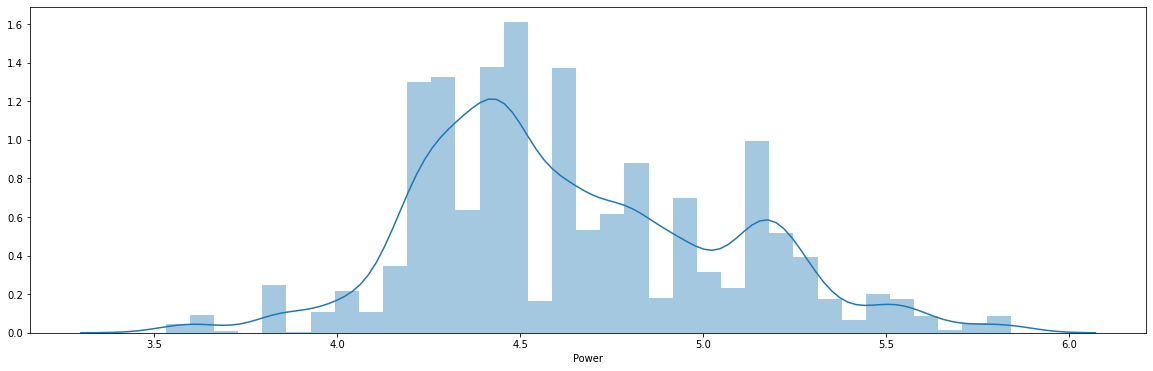

In [34]:
sns.distplot(train_data['Power'])
plt.show()

In [35]:
train_data['Colour'].astype('category').value_counts() # White car colour is high occurrence

White           2114
Others          1986
Black/Silver    1848
Name: Colour, dtype: int64

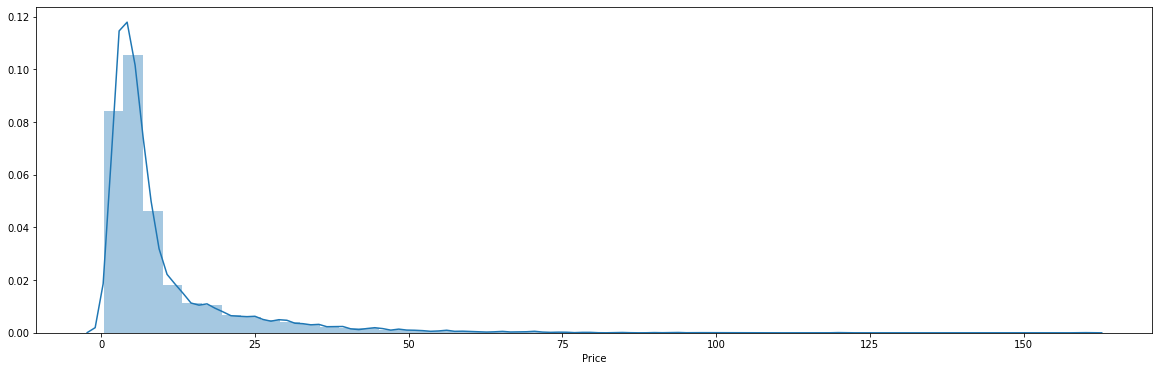

In [36]:
sns.distplot(train_data['Price'])
plt.show()

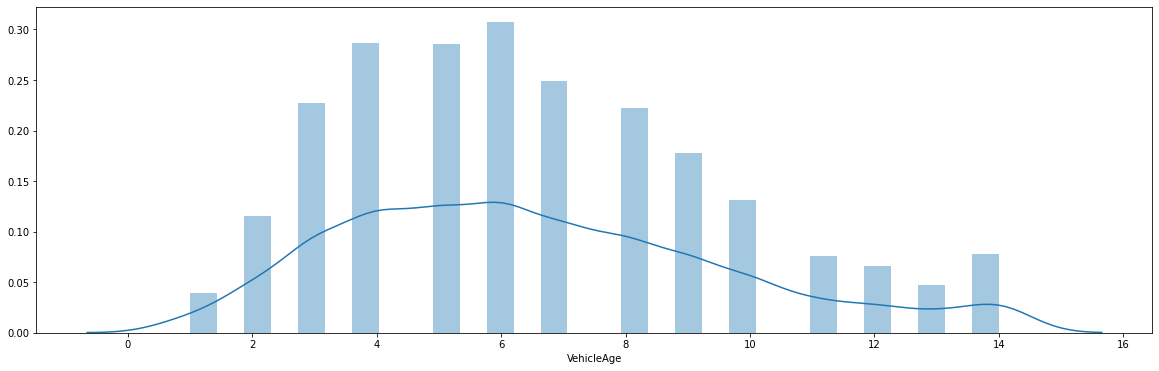

In [37]:
sns.distplot(train_data['VehicleAge'])
plt.show()

In [38]:
train_data['Manufacturer'].astype('category').value_counts()

maruti           1189
hyundai          1100
honda             601
toyota            409
mercedes-benz     318
volkswagen        315
ford              298
mahindra          271
bmw               267
audi              236
tata              184
skoda             173
renault           143
chevrolet         113
nissan             91
land rover         57
jaguar             40
mitsubishi         27
mini               26
fiat               25
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force one           3
lamborghini         1
smart               1
bentley             1
Name: Manufacturer, dtype: int64

In [39]:
train_data['Brands'].astype('category').value_counts()

swift          343
city           265
i20            247
verna          170
innova         164
              ... 
mustang          1
mux              1
countryman       1
wr-v             1
maruti 1000      1
Name: Brands, Length: 174, dtype: int64

In [40]:
train_data['Tier'].astype('category').value_counts()

1.0    4044
2.0    1904
Name: Tier, dtype: int64

**Inference from Univarate Analysis**

> 1. Mileage is normally distributed
> 2. Engine shows multimodal distribution
> 3. Power seems to be more a bimodal distribution
> 4. Price and VehicleAge shows right skewness
> 5. Top Car manufacturers are Maruti, Hyundai and Honda
> 6. Cars are more from 1-tier cities than 2-tier cities






Text(0.5, 1.0, 'Density or Relative Frequency Of Cars By Price')

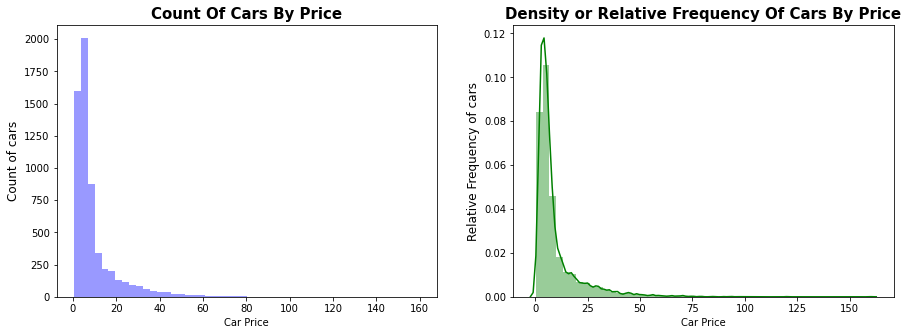

In [41]:
# target variable: price of car
fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(train_data['Price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(train_data['Price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")

**Observations on Target Variable- Price:**
The target variable price has a positive skew, however majority of the cars are low priced.

# Data Exploration
To perform linear regression, the target variable should be linearly related to independent variables. Let's see whether that's true in this case.

In [42]:
#creating df  with numeric var's only
cars_numeric=train_data.select_dtypes(include=['float64','int64'])
cars_numeric.drop('Price', axis=1).head()


,Kilometers_Driven,Mileage,Engine,Power,Seats,No. of Doors,VehicleAge,Tier
0,99.000,12.05,7.686621,4.787492,1,5.0,8.0,1.0
1,18.678,21.10,6.905753,4.605170,0,4.0,2.0,2.0
2,131.600,11.68,7.823246,4.718499,1,5.0,7.0,1.0
3,45.000,24.00,7.021084,4.248495,0,4.0,6.0,1.0
4,65.000,12.80,7.821643,4.624973,1,5.0,9.0,1.0


<Figure size 1440x720 with 0 Axes>

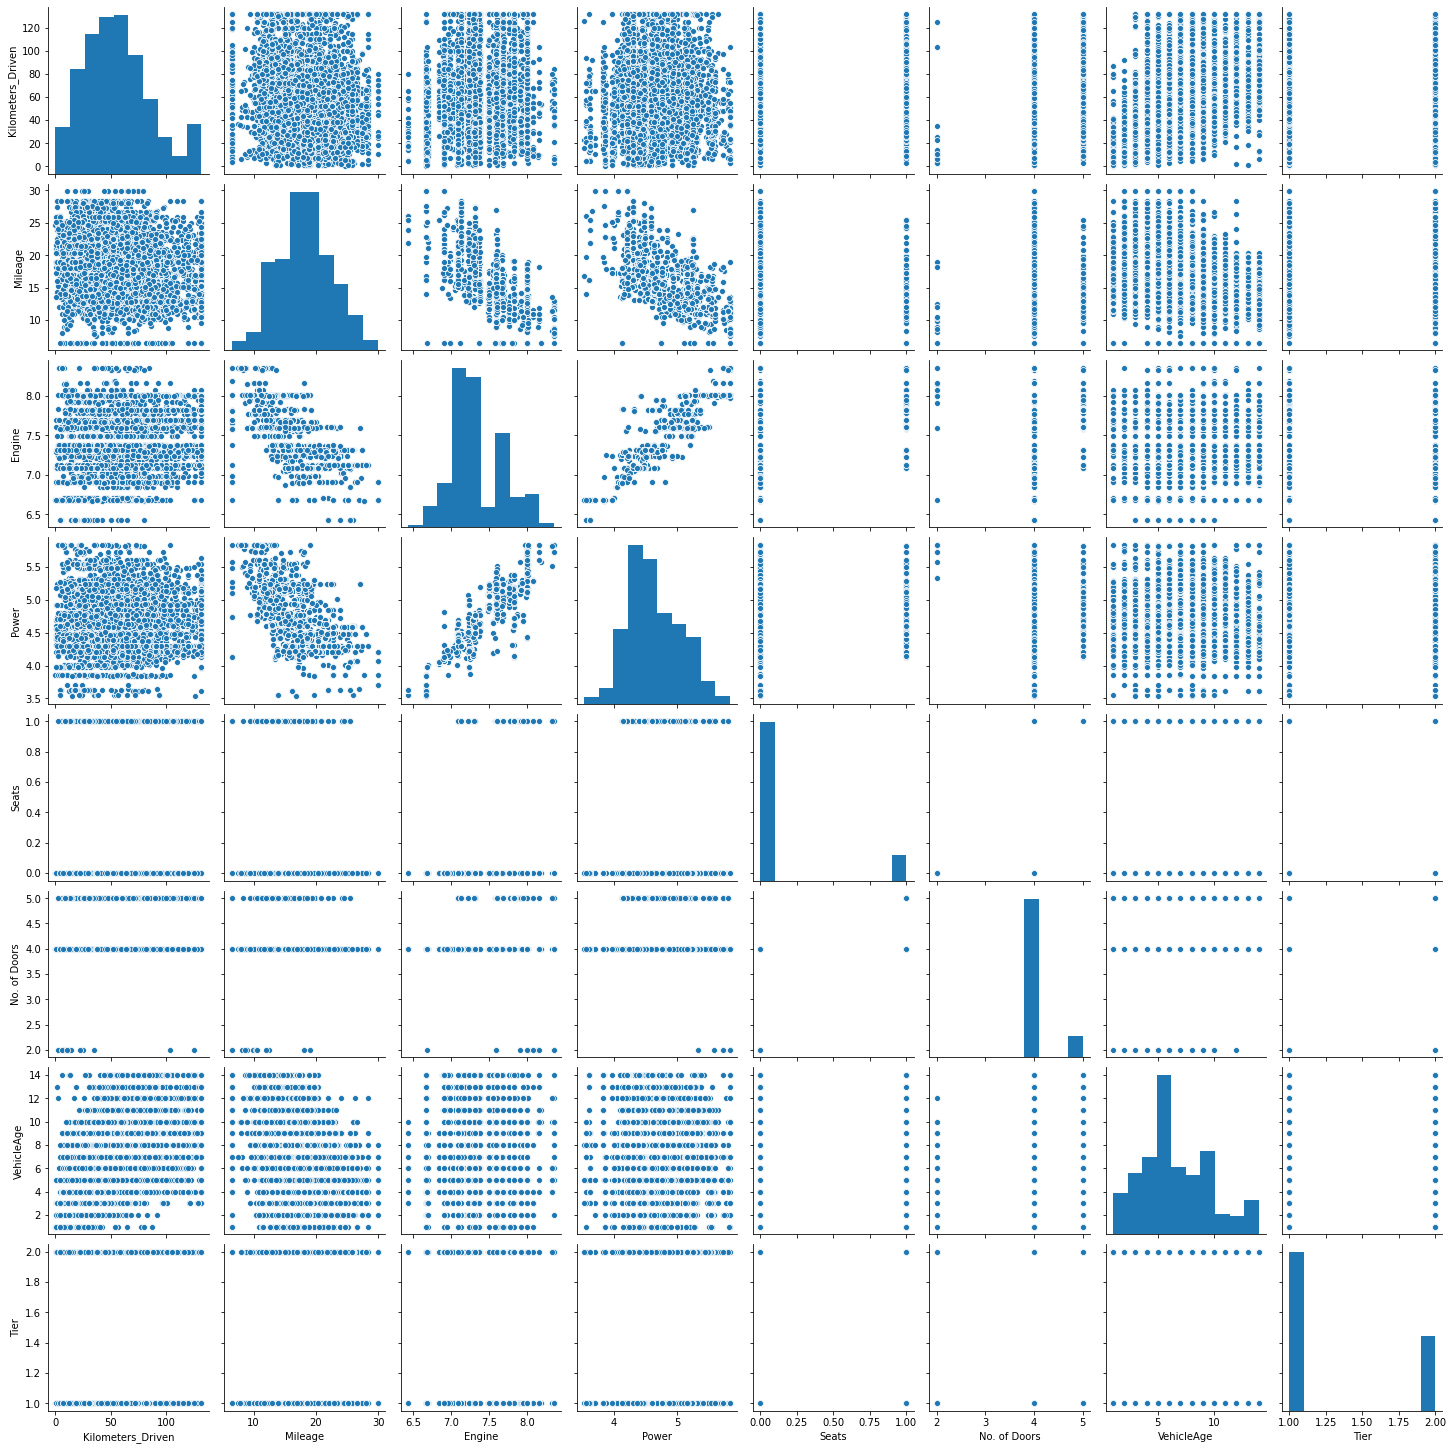

In [43]:
# paiwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric.drop('Price', axis=1))

#as we can see its difficult to interpret these graphs due to somany of them
#a BETTER way of checking linearity is in below cell

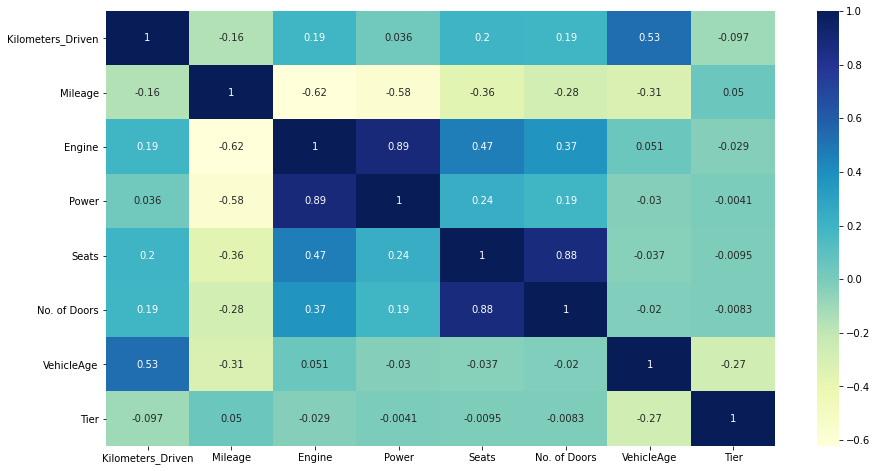

In [44]:
#Correlation matrix
corr=cars_numeric.drop('Price', axis=1).corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

Useful insights from Corr Heatmap
Dependent var and indep. var's
Positive corr: highly correlated variables are Engine, Power, No. of Doors (all of these variables represent the size/weight/engine power of the car)

Since indep. var's are highly correlated (more than 80% corr among many of them ) we'll have to pay attention to multicollinearity, which we will check in assumptions validation

# Section 2: Data Cleaning: Missing values and feature data type check

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5959 entries, 0 to 5960
Data columns (total 16 columns):
Location             5948 non-null object
Kilometers_Driven    5951 non-null float64
Fuel_Type            5959 non-null object
Transmission         5932 non-null object
Owner_Type           5944 non-null object
Mileage              5959 non-null float64
Engine               5942 non-null float64
Power                5824 non-null float64
Colour               5948 non-null object
Seats                5959 non-null int64
No. of Doors         5958 non-null float64
Price                5959 non-null float64
VehicleAge           5957 non-null float64
Manufacturer         5959 non-null object
Brands               5211 non-null object
Tier                 5948 non-null float64
dtypes: float64(8), int64(1), object(7)
memory usage: 951.4+ KB


In [46]:
train_data['Mileage'].mean()

18.238555126699158

In [47]:
train_data['Engine'].mean()

7.331742140917347

**Impute missing values**

For Engine and Mileage we use mean imputer.

For Power we use linear regression with Engine as input variable.

In [0]:
def mean_imputer(dataset) :
    
    opt_set_4 = (dataset
                    .assign( Mileage = np.where(dataset.Mileage == 0, 18.34, dataset.Mileage) )
                    .assign( Engine = dataset.Engine.fillna(7.3313) )
                )
    
    return(opt_set_4)

train_data = mean_imputer(train_data)

In [0]:
linear_data = train_data[["Engine", "Power"]].dropna(axis = 0)

missing_model = LinearRegression().fit(linear_data[["Engine"]], linear_data["Power"])

engine_for_train = pd.Series(missing_model.predict( train_data[train_data["Power"].isna()][["Engine"]].dropna(axis = 0) ))

for enum, i in enumerate(train_data[train_data["Power"].isna()].index) :
    train_data.loc[i, "Power"] = engine_for_train[enum]
    

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5959 entries, 0 to 5960
Data columns (total 16 columns):
Location             5948 non-null object
Kilometers_Driven    5951 non-null float64
Fuel_Type            5959 non-null object
Transmission         5932 non-null object
Owner_Type           5944 non-null object
Mileage              5959 non-null float64
Engine               5959 non-null float64
Power                5959 non-null float64
Colour               5948 non-null object
Seats                5959 non-null int64
No. of Doors         5958 non-null float64
Price                5959 non-null float64
VehicleAge           5957 non-null float64
Manufacturer         5959 non-null object
Brands               5211 non-null object
Tier                 5948 non-null float64
dtypes: float64(8), int64(1), object(7)
memory usage: 951.4+ KB


# Section 3. Data Preparation: feature engineering

**Next set of preprocessing**

Mean encoding for categorical variable can be done in a different form as well...thats taking reference of your dependent variable

In [51]:
#Mean Encoding
location_me = train_data.groupby("Location")["Price"].mean()
transmission_me = train_data.groupby("Transmission")["Price"].mean()
fuel_type_me = train_data.groupby("Fuel_Type")["Price"].mean()
owner_type_me = train_data.groupby("Owner_Type")["Price"].mean()
manufacturer_me = train_data.groupby("Manufacturer")["Price"].mean()
brands_me = train_data.groupby("Brands")["Price"].mean()

def mean_encoding(dataset) :
    
    op_set_5 = (dataset
                .assign( Location = dataset.Location.replace(location_me.index, location_me.values) )
                .assign( Transmission = dataset.Transmission.replace(transmission_me.index, transmission_me.values) )
                .assign( Fuel_Type = dataset.Fuel_Type.replace(fuel_type_me.index, fuel_type_me.values) )
                .assign( Owner_Type = dataset.Owner_Type.replace(owner_type_me.index, owner_type_me.values) )
                .assign( Manufacturer = dataset.Manufacturer.replace(manufacturer_me.index, manufacturer_me.values) )
                .assign( Brands = dataset.Brands.replace(brands_me.index, brands_me.values) )
               )
    
    return op_set_5

train_data = mean_encoding(train_data)
train_data.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,VehicleAge,Manufacturer,Brands,Tier
0,6.761424,99.000,12.873940,5.356154,5.107909,12.05,7.686621,4.787492,Black/Silver,1,5.0,6.00,8.0,8.027638,6.789016,1.0
1,11.220944,18.678,5.732843,5.356154,10.015362,21.10,6.905753,4.605170,Others,0,4.0,8.32,2.0,4.555938,6.686984,2.0
2,13.498291,131.600,12.873940,5.356154,10.015362,11.68,7.823246,4.718499,White,1,5.0,4.00,7.0,8.027638,4.670000,1.0
3,9.759617,45.000,12.873940,5.356154,10.015362,24.00,7.021084,4.248495,White,0,4.0,3.49,6.0,5.363673,NaN,1.0
4,9.759617,65.000,12.873940,5.356154,10.015362,12.80,7.821643,4.624973,Others,1,5.0,6.40,9.0,11.598264,12.025976,1.0


Adding new variables based on present variables

In [52]:
#Feature Enginerring
def feature_eng(dataset) :
    
    op_set_6 = (dataset
                .assign( EngPow = round(dataset.Engine / dataset.Power, 0) )
                .assign( KMMil = round(dataset.Kilometers_Driven / dataset.Mileage, 0) )
                .assign( KMEng = round(dataset.Kilometers_Driven / dataset.Engine, 0) )
                .assign( KMPow = round(dataset.Kilometers_Driven / dataset.Power, 0) )
                .assign( KMperyear = round(dataset.Kilometers_Driven / dataset.VehicleAge, 0) )
                .assign( EngPYear = round(dataset.Engine / dataset.VehicleAge, 0) )
                .assign( powerperyear = round(dataset.Power / dataset.VehicleAge, 0) ) 
                
                
               )
    
    return op_set_6

train_data = feature_eng(train_data)
train_data.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,VehicleAge,Manufacturer,Brands,Tier,EngPow,KMMil,KMEng,KMPow,KMperyear,EngPYear,powerperyear
0,6.761424,99.000,12.873940,5.356154,5.107909,12.05,7.686621,4.787492,Black/Silver,1,5.0,6.00,8.0,8.027638,6.789016,1.0,2.0,8.0,13.0,21.0,12.0,1.0,1.0
1,11.220944,18.678,5.732843,5.356154,10.015362,21.10,6.905753,4.605170,Others,0,4.0,8.32,2.0,4.555938,6.686984,2.0,1.0,1.0,3.0,4.0,9.0,3.0,2.0
2,13.498291,131.600,12.873940,5.356154,10.015362,11.68,7.823246,4.718499,White,1,5.0,4.00,7.0,8.027638,4.670000,1.0,2.0,11.0,17.0,28.0,19.0,1.0,1.0
3,9.759617,45.000,12.873940,5.356154,10.015362,24.00,7.021084,4.248495,White,0,4.0,3.49,6.0,5.363673,NaN,1.0,2.0,2.0,6.0,11.0,8.0,1.0,1.0
4,9.759617,65.000,12.873940,5.356154,10.015362,12.80,7.821643,4.624973,Others,1,5.0,6.40,9.0,11.598264,12.025976,1.0,2.0,5.0,8.0,14.0,7.0,1.0,1.0


In [53]:
train_data.isnull().sum()

Location              11
Kilometers_Driven      8
Fuel_Type              0
Transmission          27
Owner_Type            15
Mileage                0
Engine                 0
Power                  0
Colour                11
Seats                  0
No. of Doors           1
Price                  0
VehicleAge             2
Manufacturer           0
Brands               748
Tier                  11
EngPow                 0
KMMil                  8
KMEng                  8
KMPow                  8
KMperyear             10
EngPYear               2
powerperyear           2
dtype: int64

In [0]:
def impute_median(series):
    return series.fillna(series.median())

In [0]:
train_data["Seats"]=train_data['Seats'].transform(impute_median)
train_data["Location"]=train_data['Location'].transform(impute_median)
train_data["Kilometers_Driven"]=train_data['Kilometers_Driven'].transform(impute_median)
train_data["Fuel_Type"]=train_data['Fuel_Type'].transform(impute_median)
train_data["Transmission"]=train_data['Transmission'].transform(impute_median)
train_data["Owner_Type"]=train_data['Owner_Type'].transform(impute_median)
train_data["No. of Doors"]=train_data['No. of Doors'].transform(impute_median)
train_data["VehicleAge"]=train_data['VehicleAge'].transform(impute_median)
train_data["Brands"]=train_data['Brands'].transform(impute_median)
train_data["Tier"]=train_data['Tier'].transform(impute_median)
train_data["KMMil"]=train_data['KMMil'].transform(impute_median)
train_data["KMEng"]=train_data['KMEng'].transform(impute_median)
train_data["KMPow"]=train_data['KMPow'].transform(impute_median)
train_data["KMperyear"]=train_data['KMperyear'].transform(impute_median)
train_data["EngPYear"]=train_data['EngPYear'].transform(impute_median)
train_data["Engine"]=train_data['Engine'].transform(impute_median)
train_data["Power"]=train_data['Power'].transform(impute_median)
#train_data["Colour"]=train_data['Colour'].transform(impute_median) #Error:could not convert string to float: 'Black/Silver'
train_data["EngPow"]=train_data['EngPow'].transform(impute_median)


In [56]:
train_data.isnull().sum()

Location              0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Colour               11
Seats                 0
No. of Doors          0
Price                 0
VehicleAge            0
Manufacturer          0
Brands                0
Tier                  0
EngPow                0
KMMil                 0
KMEng                 0
KMPow                 0
KMperyear             0
EngPYear              0
powerperyear          2
dtype: int64

In [0]:
train_data.drop(columns= 'Colour', inplace= True)


In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5959 entries, 0 to 5960
Data columns (total 22 columns):
Location             5959 non-null float64
Kilometers_Driven    5959 non-null float64
Fuel_Type            5959 non-null float64
Transmission         5959 non-null float64
Owner_Type           5959 non-null float64
Mileage              5959 non-null float64
Engine               5959 non-null float64
Power                5959 non-null float64
Seats                5959 non-null int64
No. of Doors         5959 non-null float64
Price                5959 non-null float64
VehicleAge           5959 non-null float64
Manufacturer         5959 non-null float64
Brands               5959 non-null float64
Tier                 5959 non-null float64
EngPow               5959 non-null float64
KMMil                5959 non-null float64
KMEng                5959 non-null float64
KMPow                5959 non-null float64
KMperyear            5959 non-null float64
EngPYear             5959 non-null 

**Scaling the features**

Its a optional step not mandatory

In [59]:
#scaling features though not necessary in MLR but its good to do it as it makes interpretation of regression coefficients easier

from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols=train_data.columns
train_data_scaled=pd.DataFrame(scale(train_data))
train_data_scaled.columns=cols
train_data_scaled.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'No. of Doors',
       'Price', 'VehicleAge', 'Manufacturer', 'Brands', 'Tier', 'EngPow',
       'KMMil', 'KMEng', 'KMPow', 'KMperyear', 'EngPYear', 'powerperyear'],
      dtype='object')

In [60]:
train_data_scaled.describe()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,No. of Doors,Price,VehicleAge,Manufacturer,Brands,Tier,EngPow,KMMil,KMEng,KMPow,KMperyear,EngPYear,powerperyear
count,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.959000e+03,5.957000e+03
mean,1.001604e-16,-5.153343e-17,-7.071593e-16,4.547275e-16,-1.974312e-15,-1.680891e-16,-2.541403e-15,-2.839741e-16,7.267964e-17,-2.673273e-16,-4.681978e-17,1.873909e-16,6.502229e-17,-2.049413e-19,1.652386e-16,-4.904898e-16,1.863103e-17,-7.869747e-17,-9.874445e-18,1.258712e-16,-8.603809e-17,2.599086e-17
std,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00
min,-1.377571e+00,-1.860077e+00,-1.956284e+00,-6.336072e-01,-5.604341e+00,-2.732604e+00,-2.666379e+00,-2.687627e+00,-4.014296e-01,-6.134675e+00,-8.102411e-01,-1.799491e+00,-7.620555e-01,-9.176050e-01,-6.852326e-01,-2.303437e+00,-1.441682e+00,-1.888886e+00,-1.842277e+00,-1.687638e+00,-1.396029e+00,-1.317013e+00
25%,-9.876282e-01,-7.342782e-01,-1.054323e+00,-6.336072e-01,4.432236e-01,-6.933742e-01,-7.244558e-01,-7.754240e-01,-4.014296e-01,-3.334327e-01,-5.373960e-01,-8.282775e-01,-5.754768e-01,-4.587702e-01,-6.852326e-01,4.341339e-01,-5.814225e-01,-6.501258e-01,-7.815152e-01,-6.134983e-01,-4.821615e-01,2.661543e-02
50%,-3.004893e-02,-1.019755e-01,9.300604e-01,-6.336072e-01,4.432236e-01,-1.828675e-02,-6.906604e-02,-2.255592e-01,-4.014296e-01,-3.334327e-01,-3.456911e-01,-1.808020e-01,-4.819687e-01,-3.021164e-01,-6.852326e-01,4.341339e-01,-1.512926e-01,-1.546216e-01,-1.753654e-01,-2.554515e-01,-4.821615e-01,2.661543e-02
75%,6.048321e-01,5.636063e-01,9.300604e-01,1.578265e+00,4.432236e-01,6.661123e-01,7.774425e-01,7.111881e-01,-4.014296e-01,-3.334327e-01,4.217691e-02,4.666734e-01,-1.735725e-01,-9.095392e-02,1.459358e+00,4.341339e-01,2.788374e-01,5.886348e-01,5.823219e-01,4.606419e-01,4.317063e-01,2.661543e-02
max,1.995199e+00,2.513761e+00,9.300604e-01,1.578265e+00,4.432236e-01,2.705342e+00,3.028615e+00,2.932065e+00,2.491097e+00,2.567189e+00,1.341694e+01,2.409100e+00,1.278900e+01,7.051579e+00,1.459358e+00,4.341339e-01,7.160917e+00,3.066156e+00,3.613071e+00,1.388739e+01,5.914913e+00,6.744755e+00


We will take a log of Price as distribution showed right-skewness

In [0]:
# split into train and test
from sklearn.model_selection import train_test_split
X = train_data.drop(['Price'], axis = 1)
y = np.log(train_data["Price"])

X_train, X_test, y_train, y_test = train_test_split(train_data, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [62]:
print("Train set rows %s, cols %s and y is %s" % (X_train.shape[0], X_train.shape[1], y_train.shape[0]))
print("Test set rows %s, cols %s and y is %s" % (X_test.shape[0], X_test.shape[1], y_test.shape[0]))


Train set rows 4171, cols 22 and y is 4171
Test set rows 1788, cols 22 and y is 1788


# Section 4. Model Building 

Since our dependent variable price looks to be linearly related to most of the independent variables we are using Linear Regression only and not other types of regression like Polynomial, Random Forest/Boosting regression etc.

In [64]:
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Fit regression model (using the natural log of one of the regressors)
X = train_data.drop(['Price'], axis = 1)
y = np.log(train_data["Price"])
results = smf.ols('np.array(y) ~ np.array(X)', data= train_data_scaled).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            np.array(y)   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     3271.
Date:                Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:19:47   Log-Likelihood:                -97.764
No. Observations:                5957   AIC:                             239.5
Df Residuals:                    5935   BIC:                             386.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.6618      0.220    -

In [66]:
train_data_scaled.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'No. of Doors',
       'Price', 'VehicleAge', 'Manufacturer', 'Brands', 'Tier', 'EngPow',
       'KMMil', 'KMEng', 'KMPow', 'KMperyear', 'EngPYear', 'powerperyear'],
      dtype='object')

**Line formula for this final model**

ypred = -3.6618 + 0.0282*Location + -0.0043 * Kilometers_Driven + 0.0223* Fuel_Type + 0.0101* Transmission + 0.0276* Owner_Type + 0.0005* Mileage + 0.2457* Engine + 0.806* Power +	0.1655* Seats + -0.0669* No.of Doors + 0.1314* VehicleAge + 0.0256* Manufacturer + 0.0089* Brands + -0.0231* Tier + 0.0103* EngPow + -0.0006* KMMil + -0.0055* KMEng + 0.0258* KMPow + -0.0089* KMperyear + -0.0159* EngPYear + -0.0096* powerperyear


# Section 5: Linear Regression Assumptions Validation

**1. Linearity of the model**

The dependent variable (y) is assumed to be a linear function of the independent variables (X, features) specified in the model. The specification must be linear in its parameters. Fitting a linear model to data with non-linear patterns results in serious prediction errors, especially out-of-sample (data not used for training the model).

To detect nonlinearity one can inspect plots of observed vs. predicted values or residuals vs. predicted values. The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or around a horizontal line in the latter one. In both cases with a roughly constant variance.



**Normality of the residuals**
Jarque-Bera test:

In [75]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)


[('Jarque-Bera', 43181.63588943164),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', -1.003436629878844),
 ('Kurtosis', 16.036326641498835)]

In [76]:
#Omni test:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 1915.0531851615897), ('Two-tail probability', 0.0)]

**2. Homoscedasticity (equal variance) of residuals**

When residuals do not have constant variance (they exhibit heteroscedasticity), it is difficult to determine the true standard deviation of the forecast errors, usually resulting in confidence intervals that are too wide/narrow.

To investigate if the residuals are homoscedastic, we can look at a plot of residuals (or standardized residuals) vs. predicted (fitted) values. 

We can also use two statistical tests: Breusch-Pagan and Goldfeld-Quandt. In both of them, the null hypothesis assumes homoscedasticity and a p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

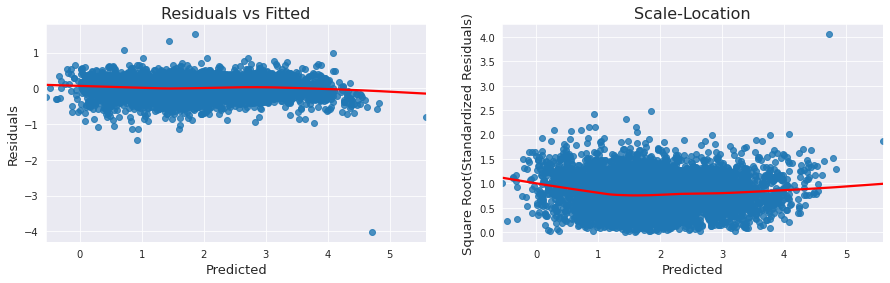

In [71]:
#Homoscedasticity-the variance of the error term must be the same across all levels of independent variables.
#This assumption can be tested by visual inspection of a standardized residual plot by the standardized regression 
#predicted value. Ideally, when the residuals are evenly scattered around the horizontal line, there is presence 
#of homoscedasticity; and when the residuals are not evenly scattered around the horizontal line and takes a various 
#shape like a bowtie, funnel shape, etc., then there is the presence of heteroscedasticity.
 
import statsmodels.stats.api as sms

def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    residuals = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal
    
    sns.set_style('darkgrid')
    
    
    fig, ax = plt.subplots(1,2,figsize=(15,4))

    sns.regplot(x=fitted_vals, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Residuals', fontsize=13)

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Square Root(Standardized Residuals)', fontsize=13)

      
homoscedasticity_test(results)


**Heteroskedasticity tests**

Breush-Pagan test:

In [77]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 196.53246816014118),
 ('p-value', 1.740471490665163e-30),
 ('f-value', 9.642241479642463),
 ('f p-value', 4.6962042702262665e-31)]

**Goldfeld-Quandt test**

In [78]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 1.1365355429555715), ('p-value', 0.0002525530692564893)]

**3. Normality of residuals**

When this assumption is violated, it causes problems with calculating confidence intervals and various significance tests for coefficients. When the error distribution significantly departs from Gaussian, confidence intervals may be too wide or too narrow.

Some of the potential reasons causing non-normal residuals:

presence of a few large outliers in data

there might be some other problems (violations) with the model assumptions

another, better model specification might be better suited for this problem

**Identifying Outliers/influential Cases**

In [0]:
#Function to plot standardized residuals vs Leverage and cook's distance for outlier detection

def influential_outlier_test(model,top_influencing_obs_count):
    
    influence = model.get_influence()

#leverage (hat values)
    leverage = influence.hat_matrix_diag

#When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), 
#the cases are influential to the regression results. The regression results will be altered if we exclude those cases.
    cooks_d = influence.cooks_distance

#standardized residuals= (Residual/STD of Residuals)
    standardized_residuals = influence.resid_studentized_internal

#studentized residuals
    studentized_residuals = influence.resid_studentized_external 
    
    
    plot_lm = plt.figure(figsize=(15,5))
    plt.scatter(leverage, standardized_residuals, alpha=0.5)
    sns.regplot(leverage, standardized_residuals,scatter=False,ci=False,lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm.axes[0].set_xlim(0, max(leverage)+0.01)
    plot_lm.axes[0].set_ylim(-10, 6)
    plot_lm.axes[0].set_title('Standardized Residuals vs Leverage',fontsize=16)
    plot_lm.axes[0].set_xlabel('Leverage',fontsize=13)
    plot_lm.axes[0].set_ylabel('Standardized Residuals',fontsize=13);

    # annotations- #annotating index position of the top n cook's D points 
    
    leverage_top_n_obs = np.flip(np.argsort(cooks_d[0]), 0)[:top_influencing_obs_count]  
    
    for i in leverage_top_n_obs:
        plot_lm.axes[0].annotate(i,xy=(leverage[i],studentized_residuals[i])) 
    
    
# shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(results.params) # number of model parameters

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(leverage), 50),'Cook\'s distance')#cookd= 0.5 line
    plt.legend(loc='upper right');


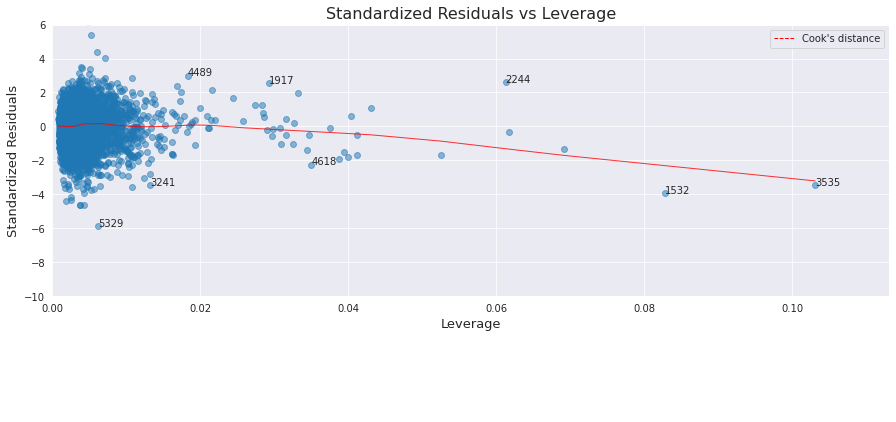

In [88]:
influential_outlier_test(model=results,top_influencing_obs_count=10)
#I am annotating top 10  

#ignore warning it because you can't calculate the square root of a negative number (stackoveflow)

Inference: **No Outliers found**

**Multicollinearity**
Condition number:

In [90]:
np.linalg.cond(results.model.exog)

5029.871853771513

The final model meets all the assumptions including no mutlicollinearity & no outliers and has an R-Square of 92%

Variables used for building model is:

> * Location        
> * Fuel_Type 
> * Transmission
> * Owner_Type
> * Mileage 
> * Power 
> * No. of Doors 
> * VehicleAge
> * Manufacturer
> * Brands
> * Tier 
> * EngPow 
> * KMperyear
> * EngPYear
> * Powerperyear